#                                Census Income

Problem statement:
    
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).
The prediction task is to determine whether a person makes over $50K a year.Here income is the target variable.we have to predict the income with person over 50 k.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 32561 rows and 15 columns are there.('Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country') are independent variables and income which is the target variable.
       

In [2]:
#dhape of the dataset
df.shape

(32561, 15)

In [3]:
#first 5 records
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#last 5 records
df.tail()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#print the columns
df.columns

Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income'],
      dtype='object')

In [6]:
#iformation about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationNum    32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  Hours per Week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32536 rows , 14 Independent columns and 1 Target feature.
Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.
Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatype

In [7]:
#to check for null values
df.isnull().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64

In [8]:
#to know data types
df.dtypes

Age                int64
Workclass         object
Final Weight       int64
Education         object
EducationNum       int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital Gain       int64
capital loss       int64
Hours per Week     int64
Native Country    object
Income            object
dtype: object

In [9]:
#check how many question mark (" ?") inside dataset.
df.isin(['?']).sum().any()

False

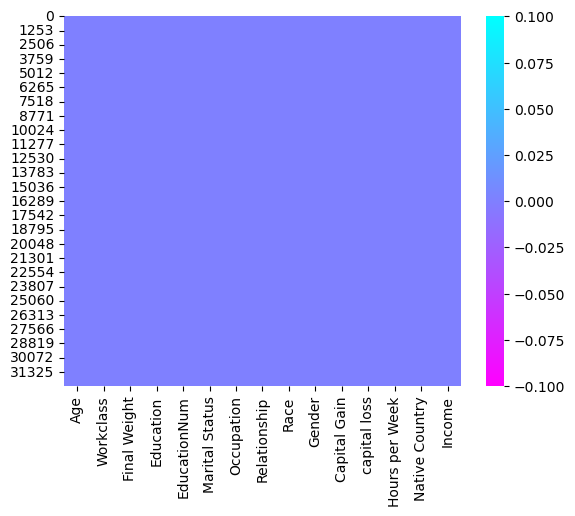

In [10]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

In [11]:
#statistical summary of the data set'
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final Weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
EducationNum,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours per Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [12]:
#to identify unique values in the data set
df['Native Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Here  in Native Country column there are null values present in the form of question mark(?).we have to drop that.

In [13]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Here  in occupation column there are null values present in the form of question mark(?).we have to drop that.

In [14]:
#drop the null value in the column
df.drop(df[df['Native Country'] == ' ?'].index,inplace=True)

In [15]:
#drop the null value in the column
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [16]:
df['Native Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<AxesSubplot:>

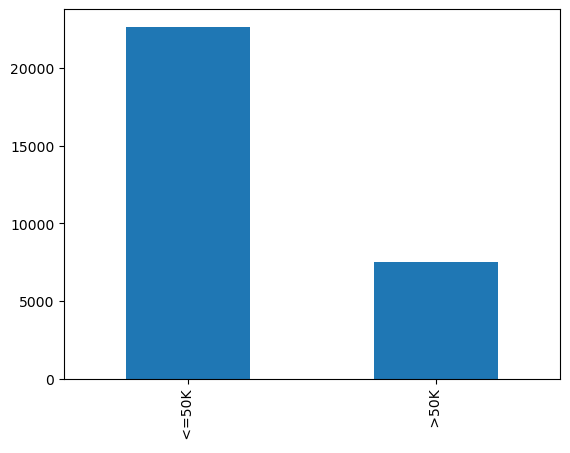

In [18]:
#income value
df['Income'].value_counts().plot(kind='bar')

75.9 % population (24697 peoples) have income less than 50K.
Our task is to predict income and we see that target variable income is imbalanced

Lets plot via graphs

EDUCATION VS INCOME

<AxesSubplot:xlabel='Education', ylabel='count'>

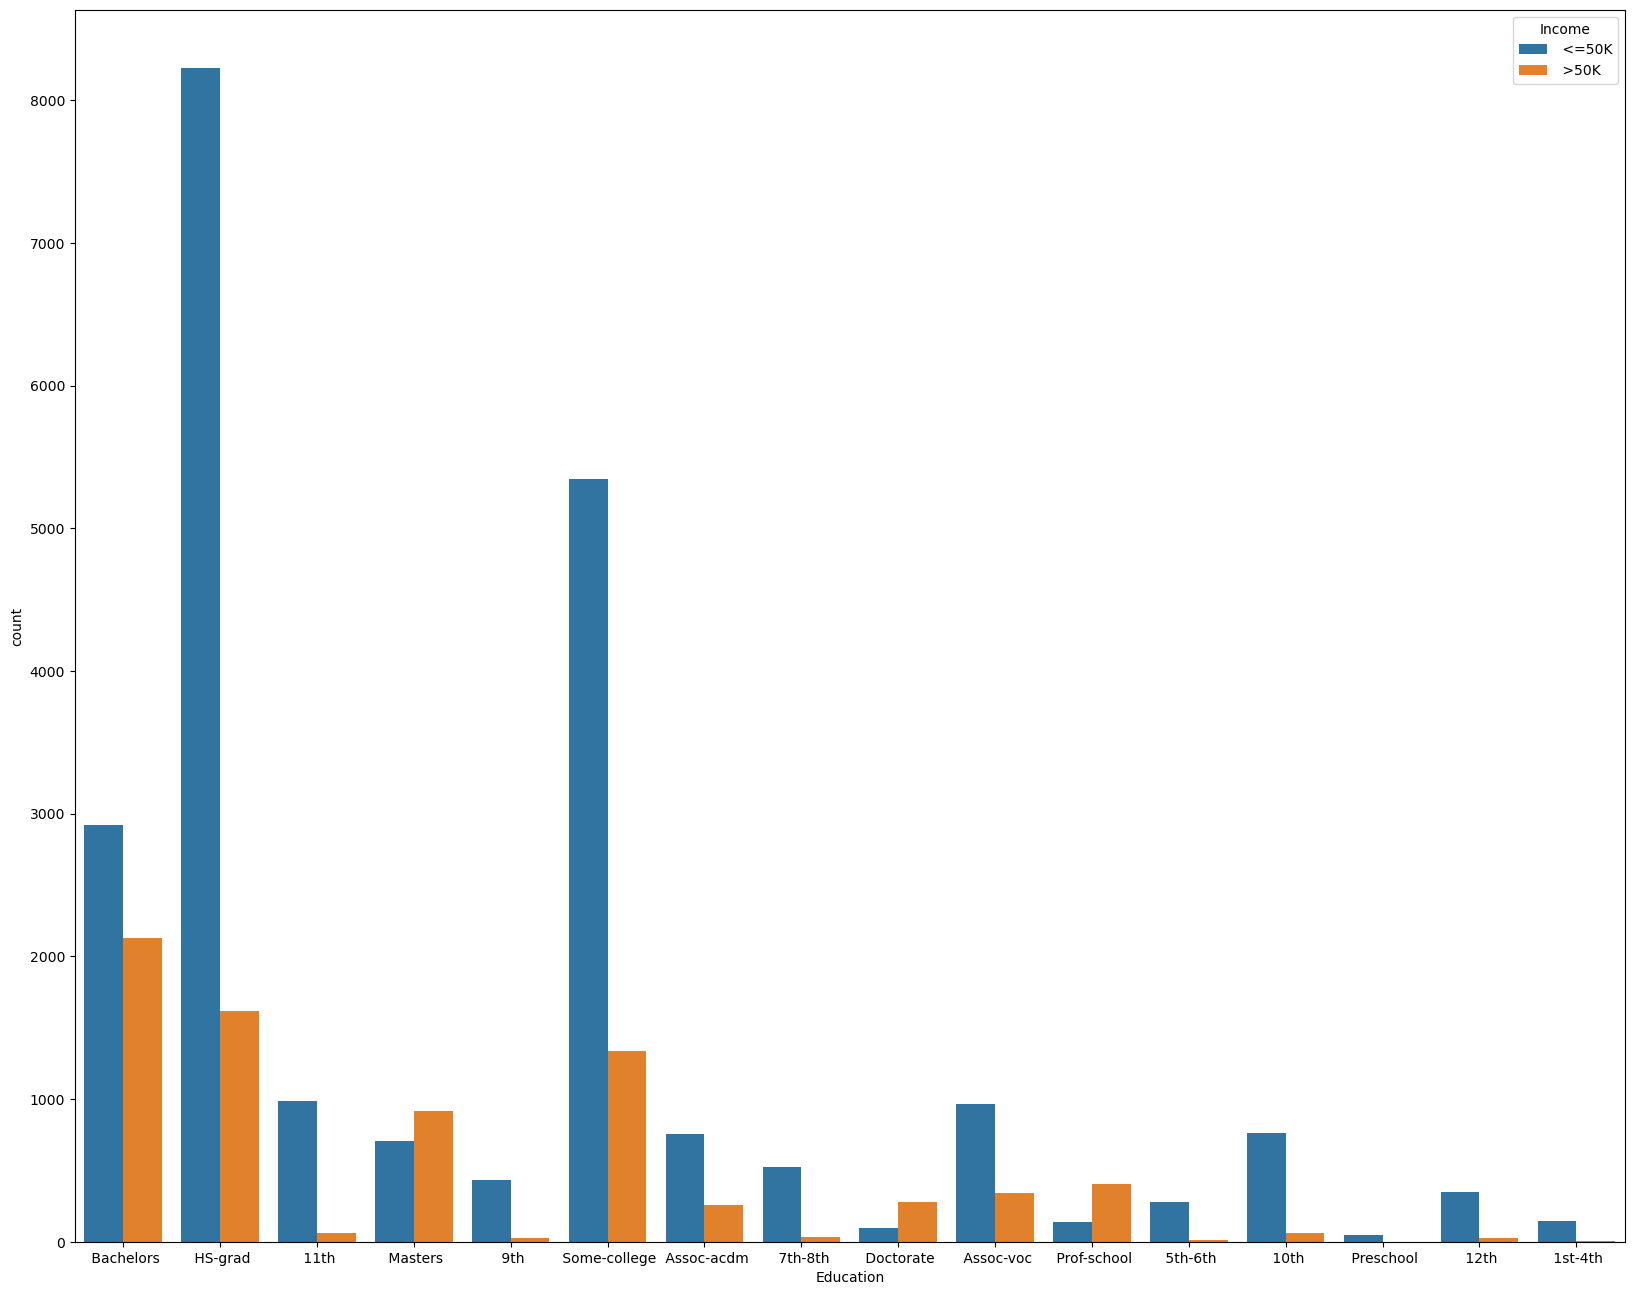

In [19]:
plt.figure(figsize=(20,16))
sns.countplot(x='Education',hue='Income',data=df)

People having bachelors degree earns>50 k when compared to others.

Also here are very handful people who earn more than 50 K  having education below 12th level.

Highly earning people most of times comes with Masters or Doctorate education background.



OCCUPATION VS INCOME

<AxesSubplot:xlabel='Occupation', ylabel='count'>

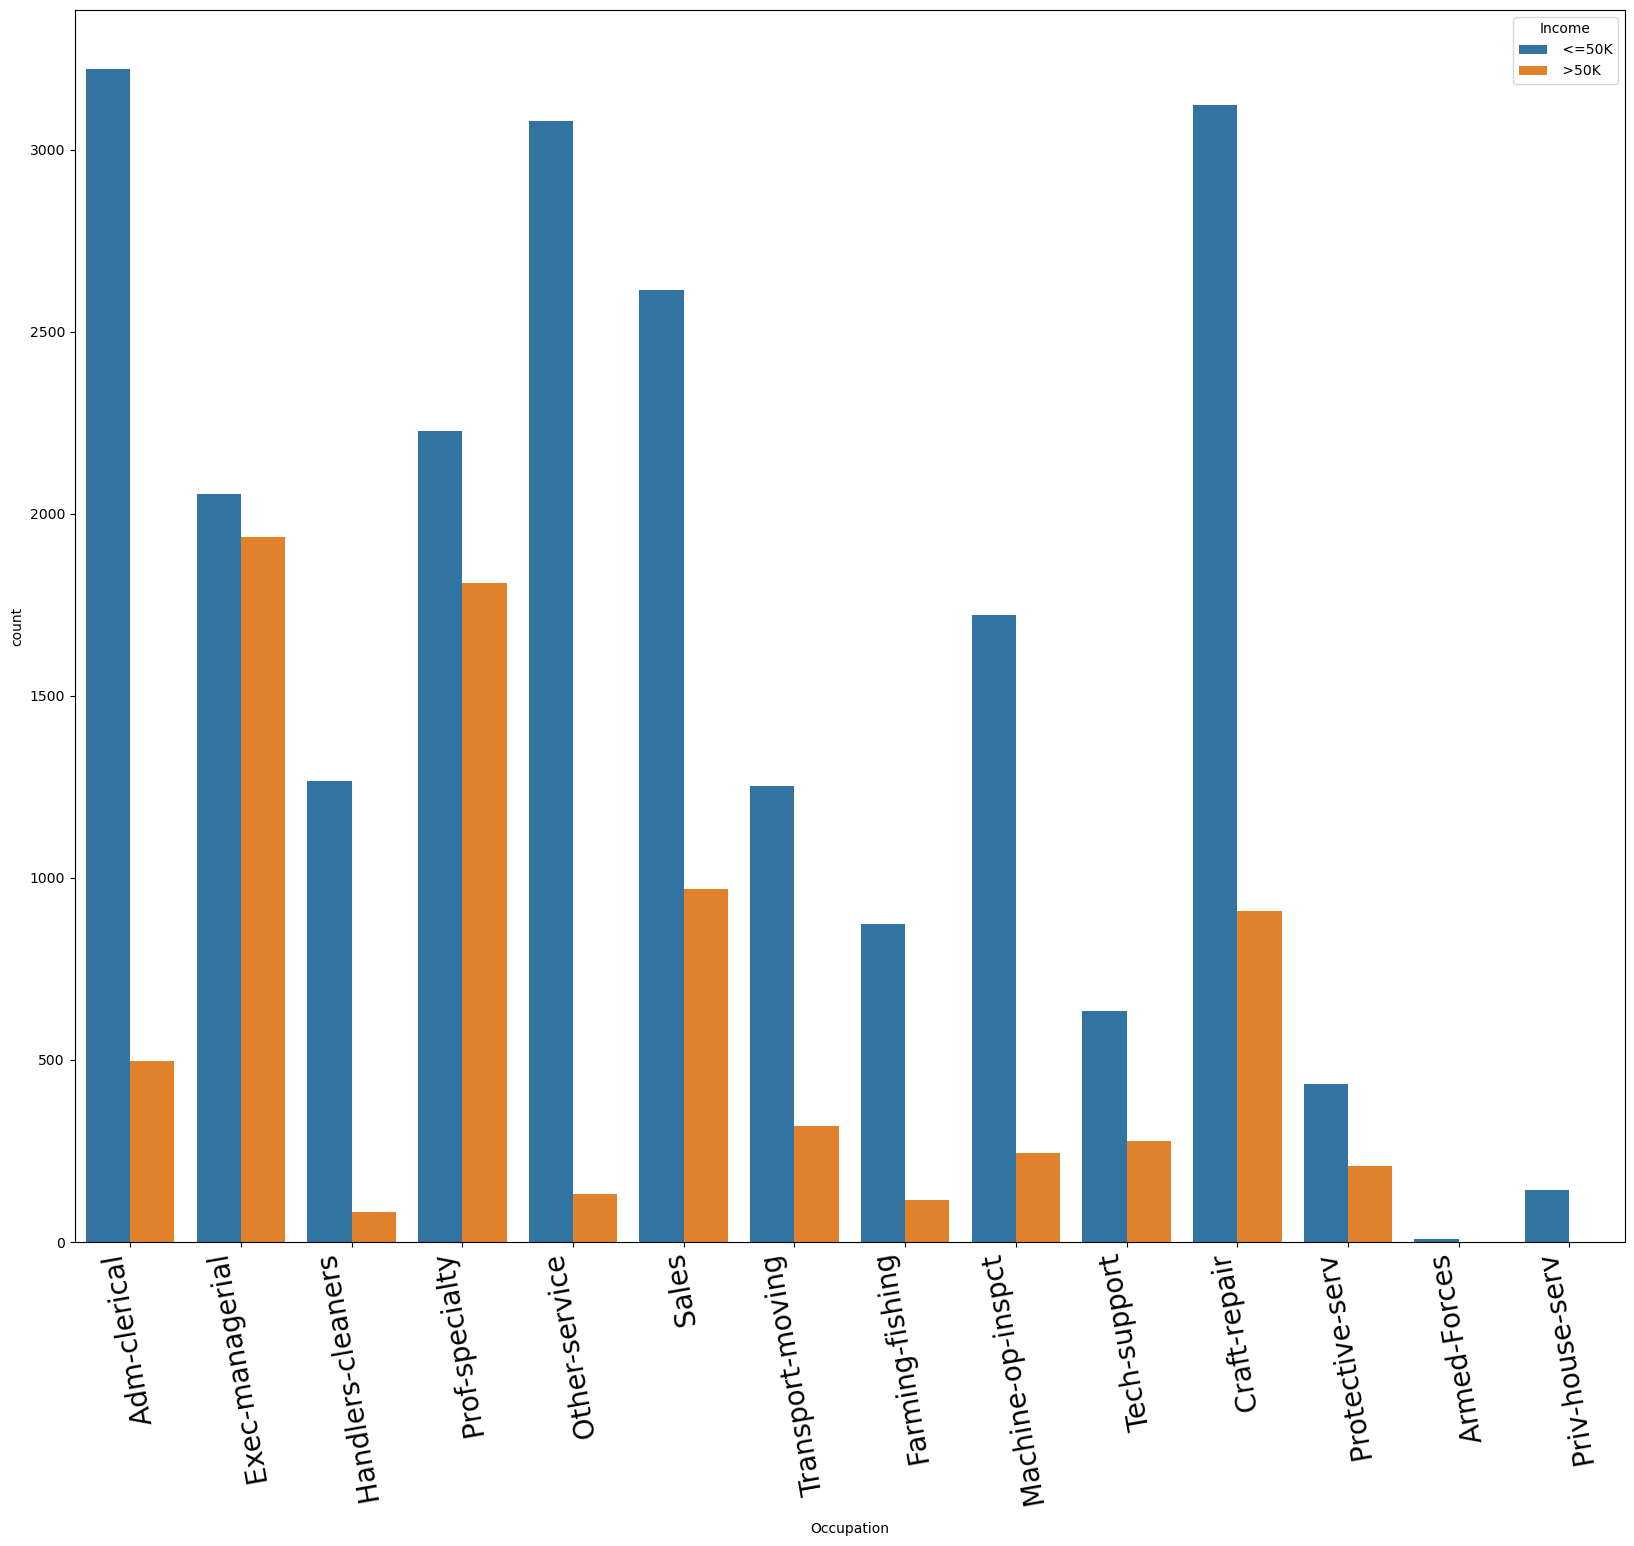

In [20]:
plt.figure(figsize=(20,16))
plt.xticks(size=20,rotation=100)
sns.countplot(x='Occupation',hue='Income',data=df)

Exec-managerial role are equally likely to earn more than 50K dollars an year.
Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
Around 25% of the people working in Sales earn more than 50K dollars an year

<AxesSubplot:xlabel='Occupation'>

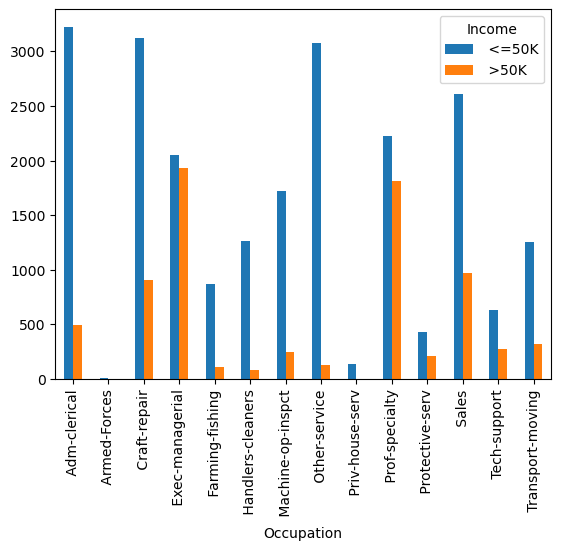

In [21]:
pd.crosstab(df['Occupation'],df["Income"]).plot.bar()

RELATIONSHIP VS INCOME

<AxesSubplot:xlabel='Relationship', ylabel='count'>

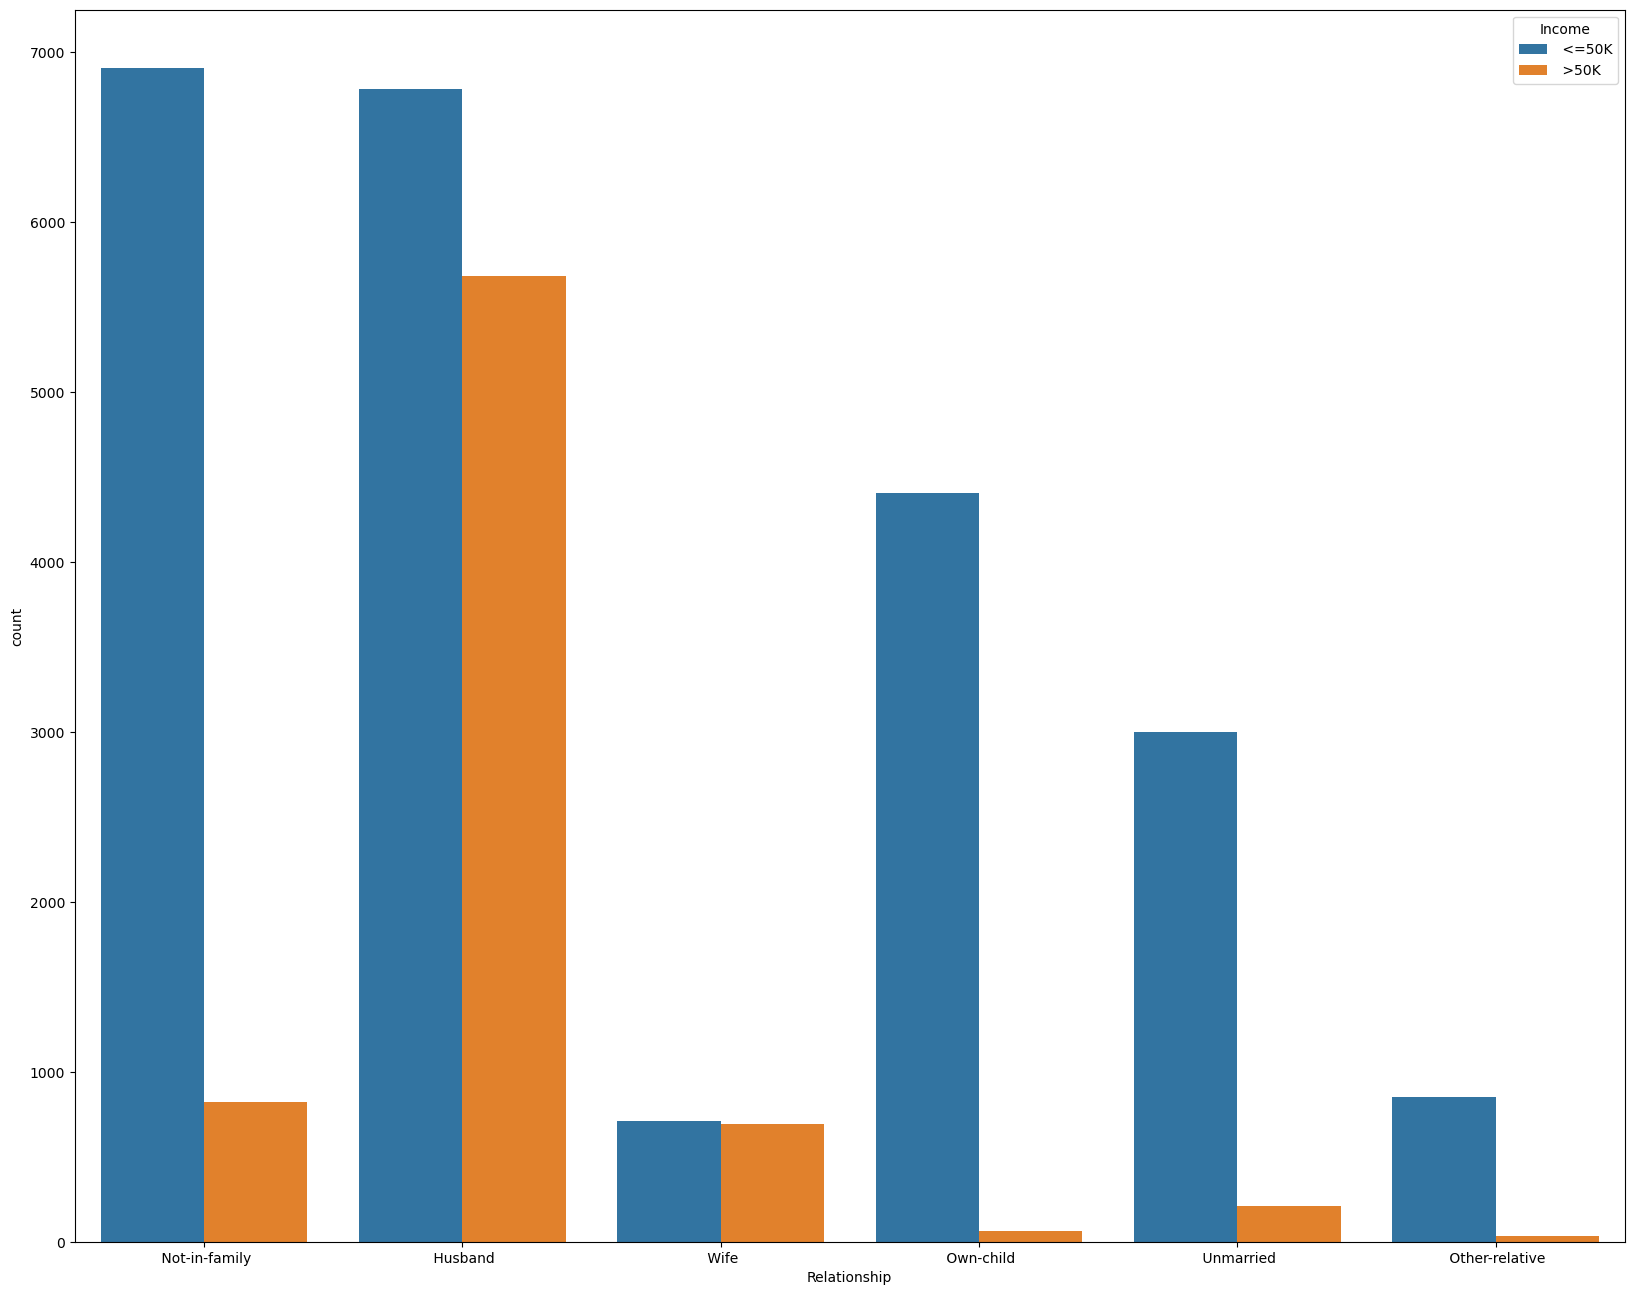

In [22]:
plt.figure(figsize=(20,16))
sns.countplot(df['Relationship'],hue=df['Income'],data=df)

Husbands are more likely to earn above 50 k.
Wives are equally likely to earn more than 50K.Also there are handful of Unmarried people earning more than 50K dollars

RACE VS INCOME

<AxesSubplot:xlabel='Race', ylabel='count'>

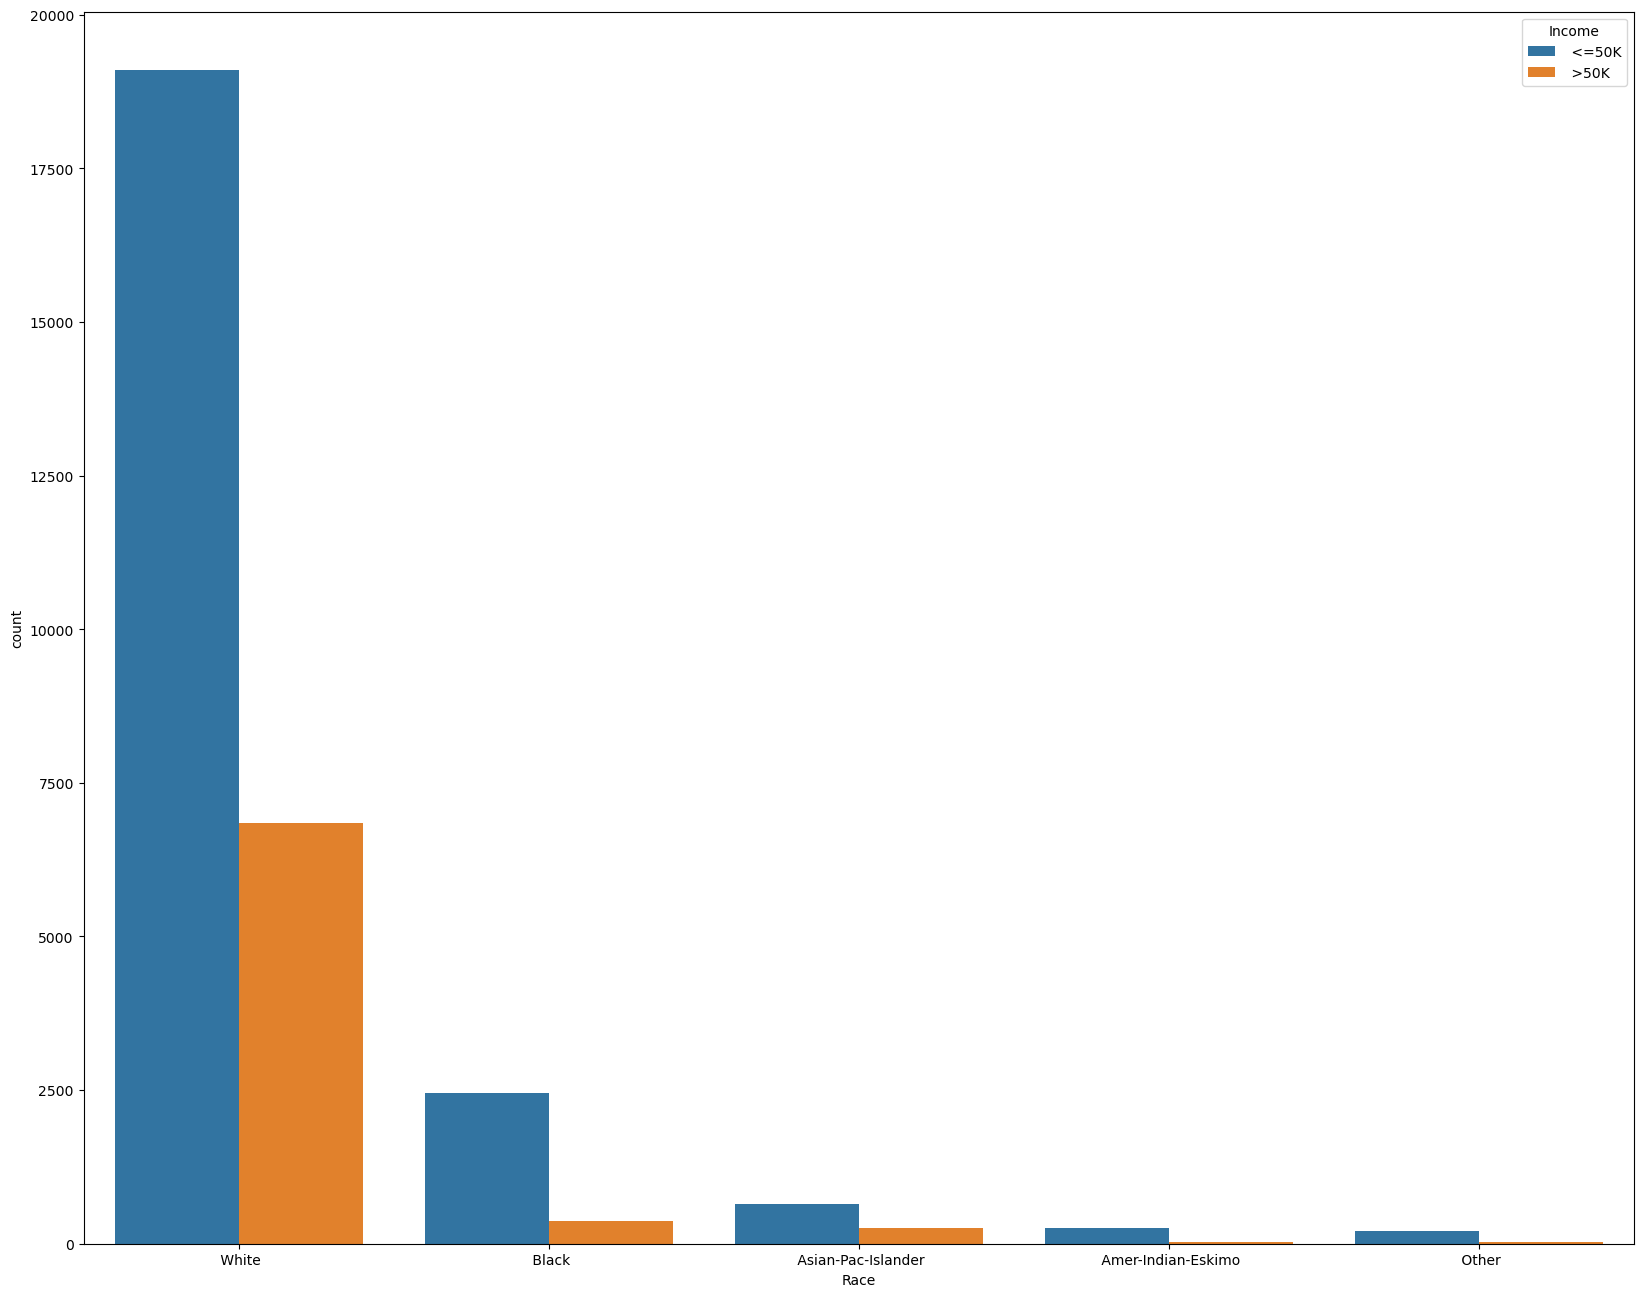

In [23]:
plt.figure(figsize=(20,16))
sns.countplot(x=df['Race'],hue=df['Income'],data=df)

Maximum people earn >50 k are under White than other races.

GENDER VS INCOME

<AxesSubplot:xlabel='Gender', ylabel='count'>

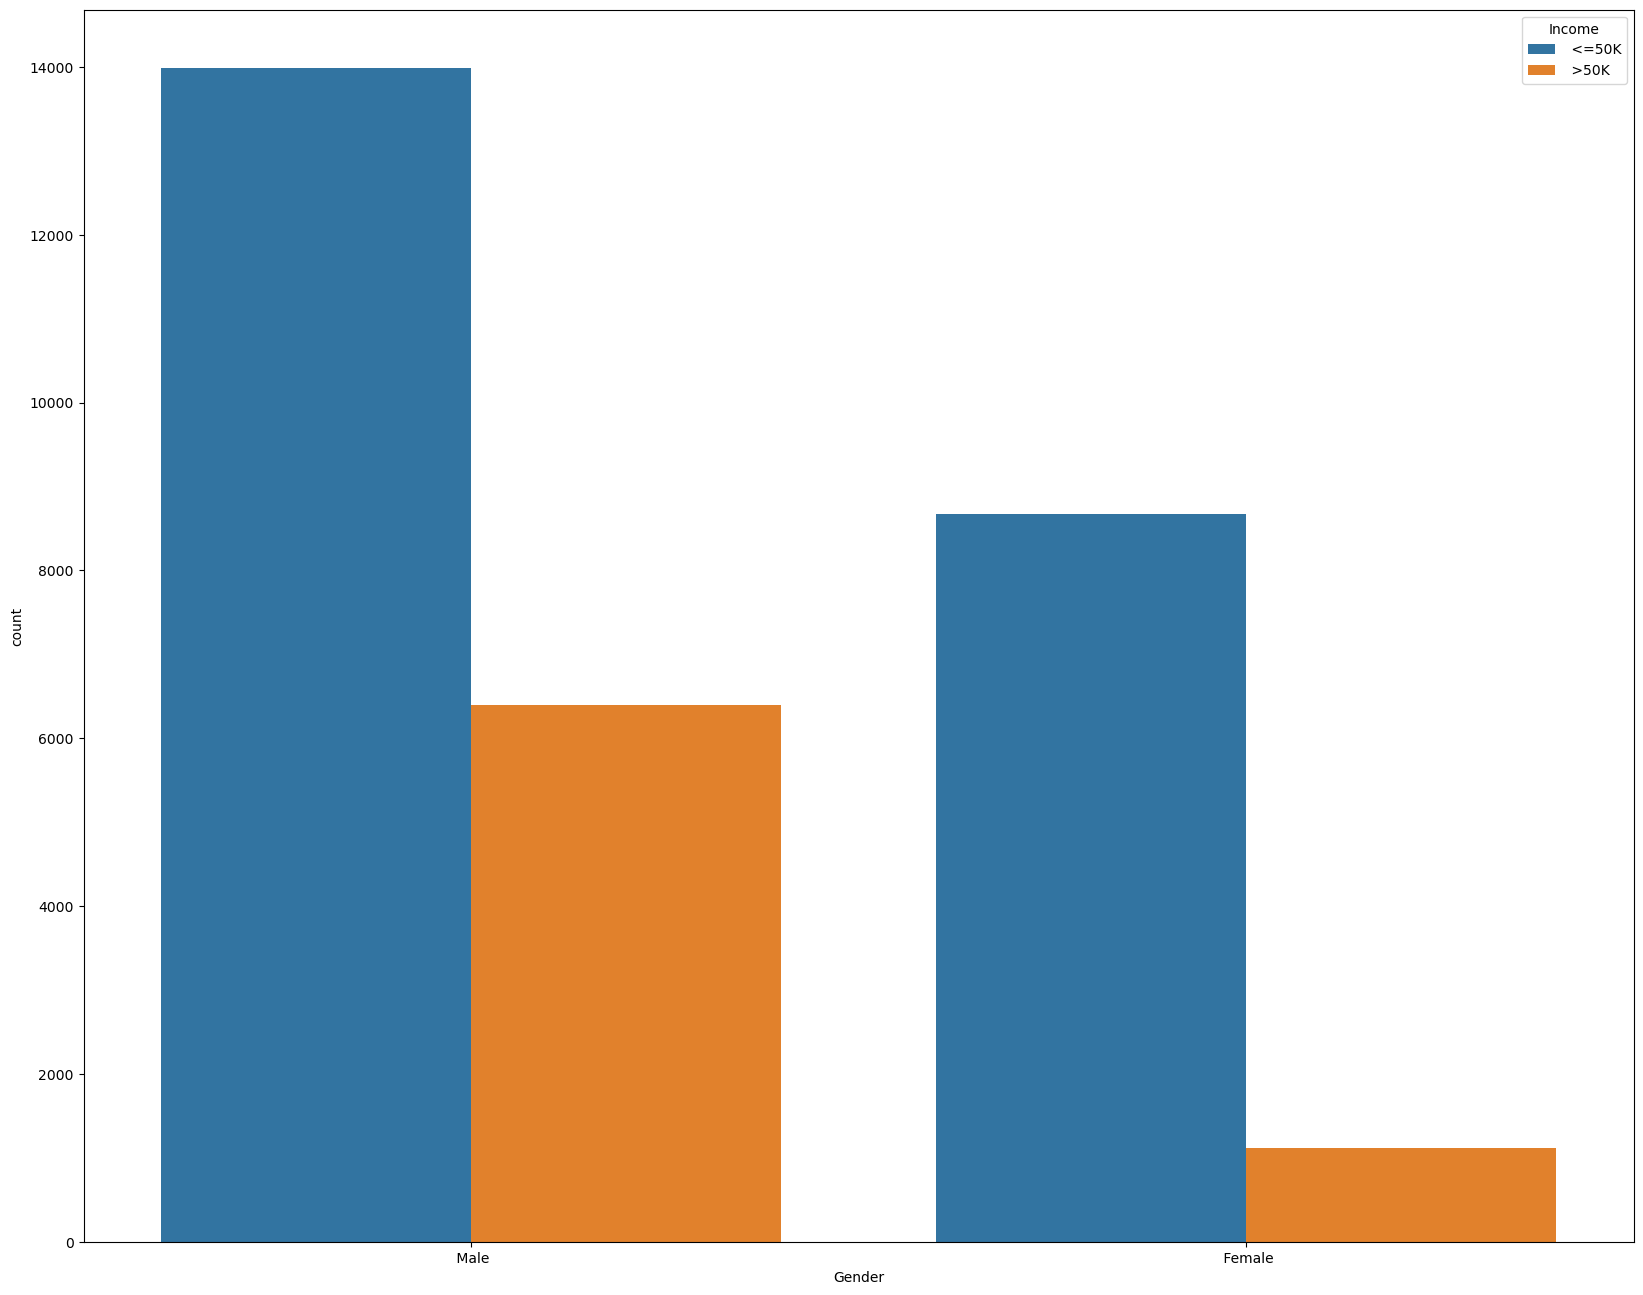

In [24]:
plt.figure(figsize=(20,16))
sns.countplot(df['Gender'],hue=df['Income'] ,data=df)

Men earning more than 50K  than women dollars an year.A lot of gap between the earnings of men and women

<AxesSubplot:xlabel='Occupation'>

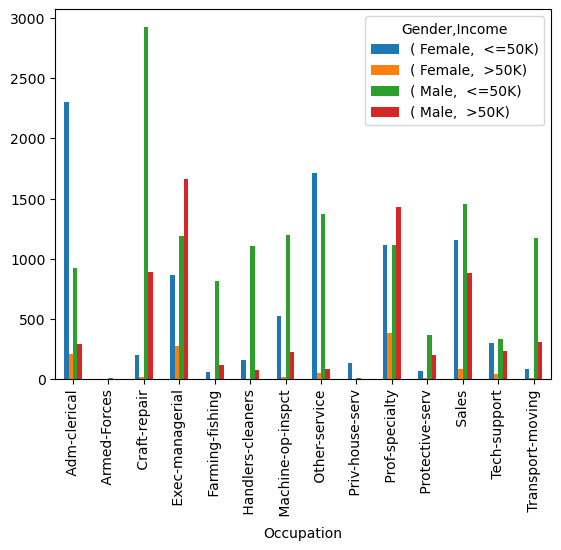

In [25]:
pd.crosstab(df['Occupation'],[df.Gender,df.Income]).plot.bar()

most of females work in Adm-clerical,Other-service,Prof-specialty.

Maximum men work in Prof-Specialty.

<AxesSubplot:xlabel='Hours per Week', ylabel='Income'>

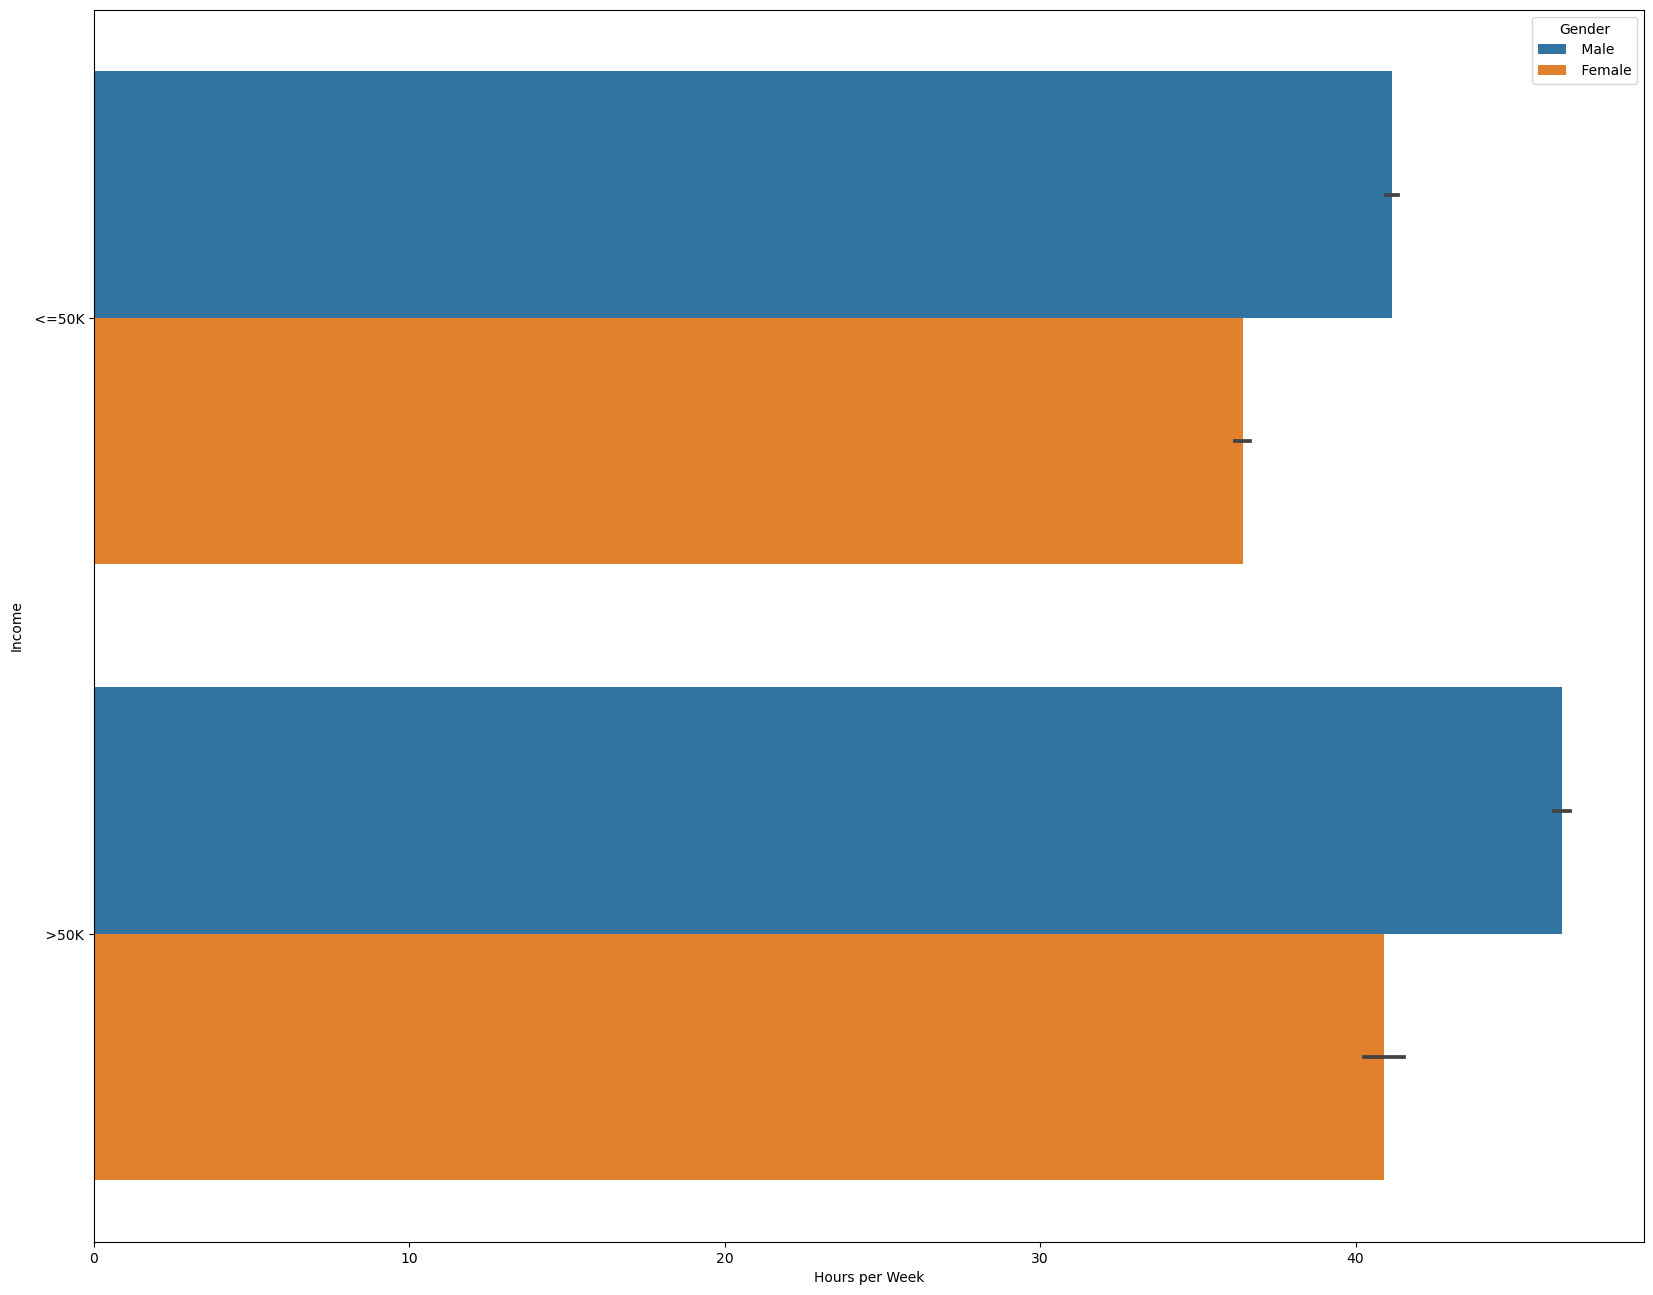

In [26]:
plt.figure(figsize=(20,16))
sns.barplot(x='Hours per Week',y='Income',hue='Gender',data=df)

<AxesSubplot:xlabel='Final Weight', ylabel='Income'>

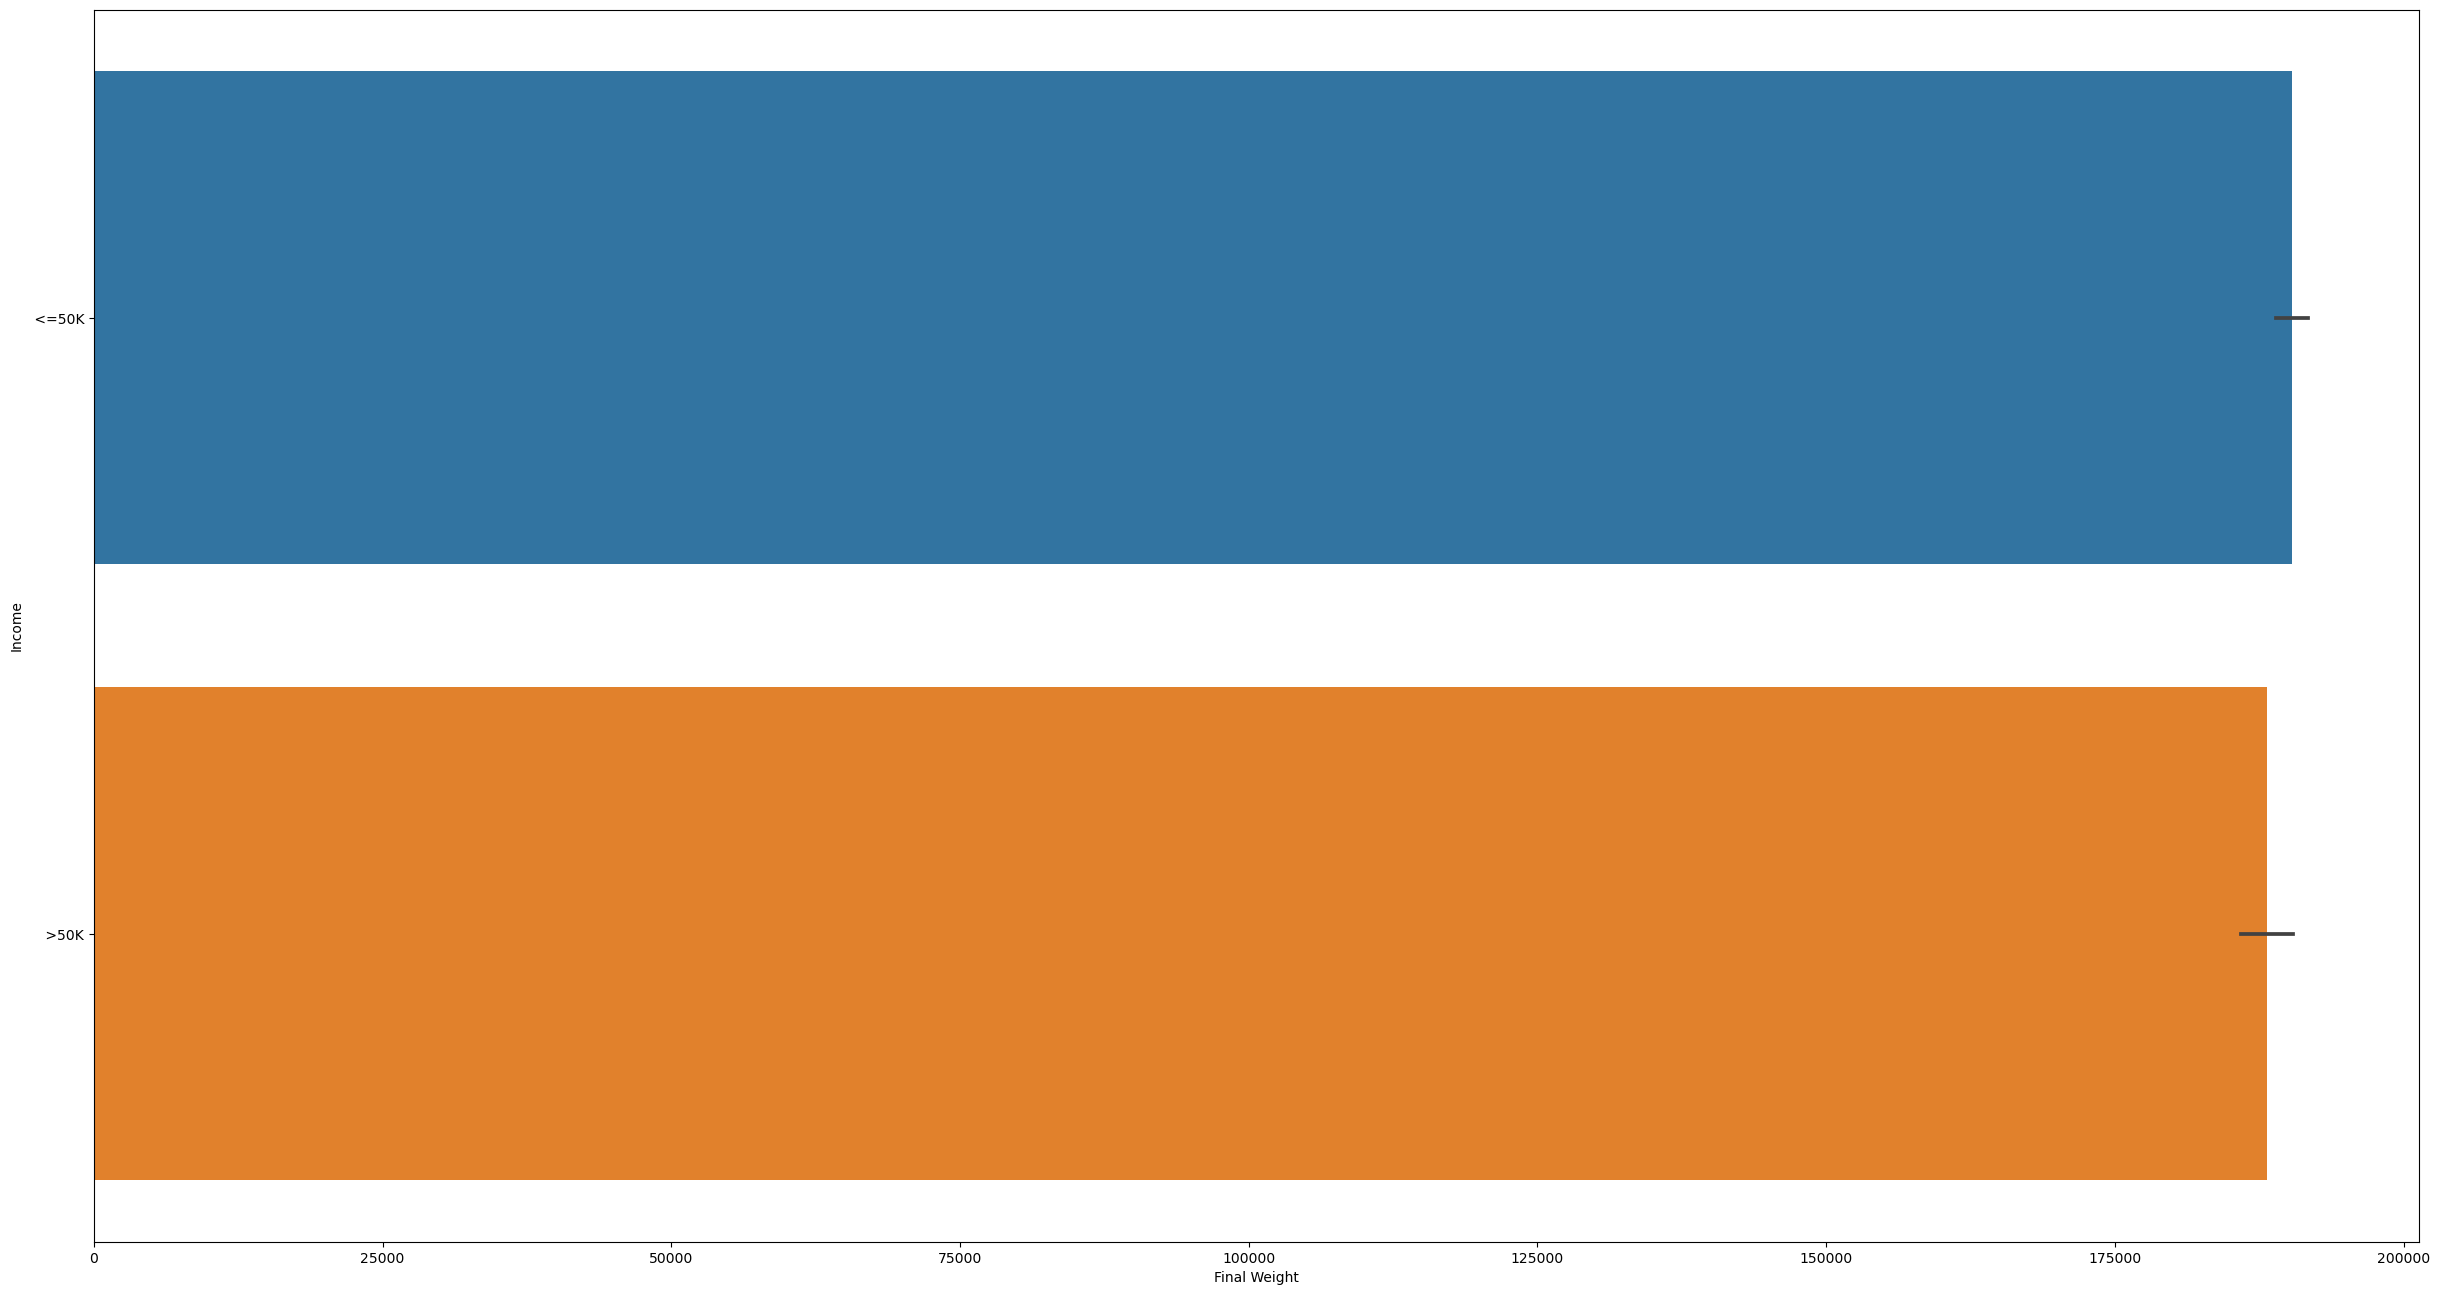

In [27]:
plt.figure(figsize=(30,16))
sns.barplot(x='Final Weight',y='Income',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

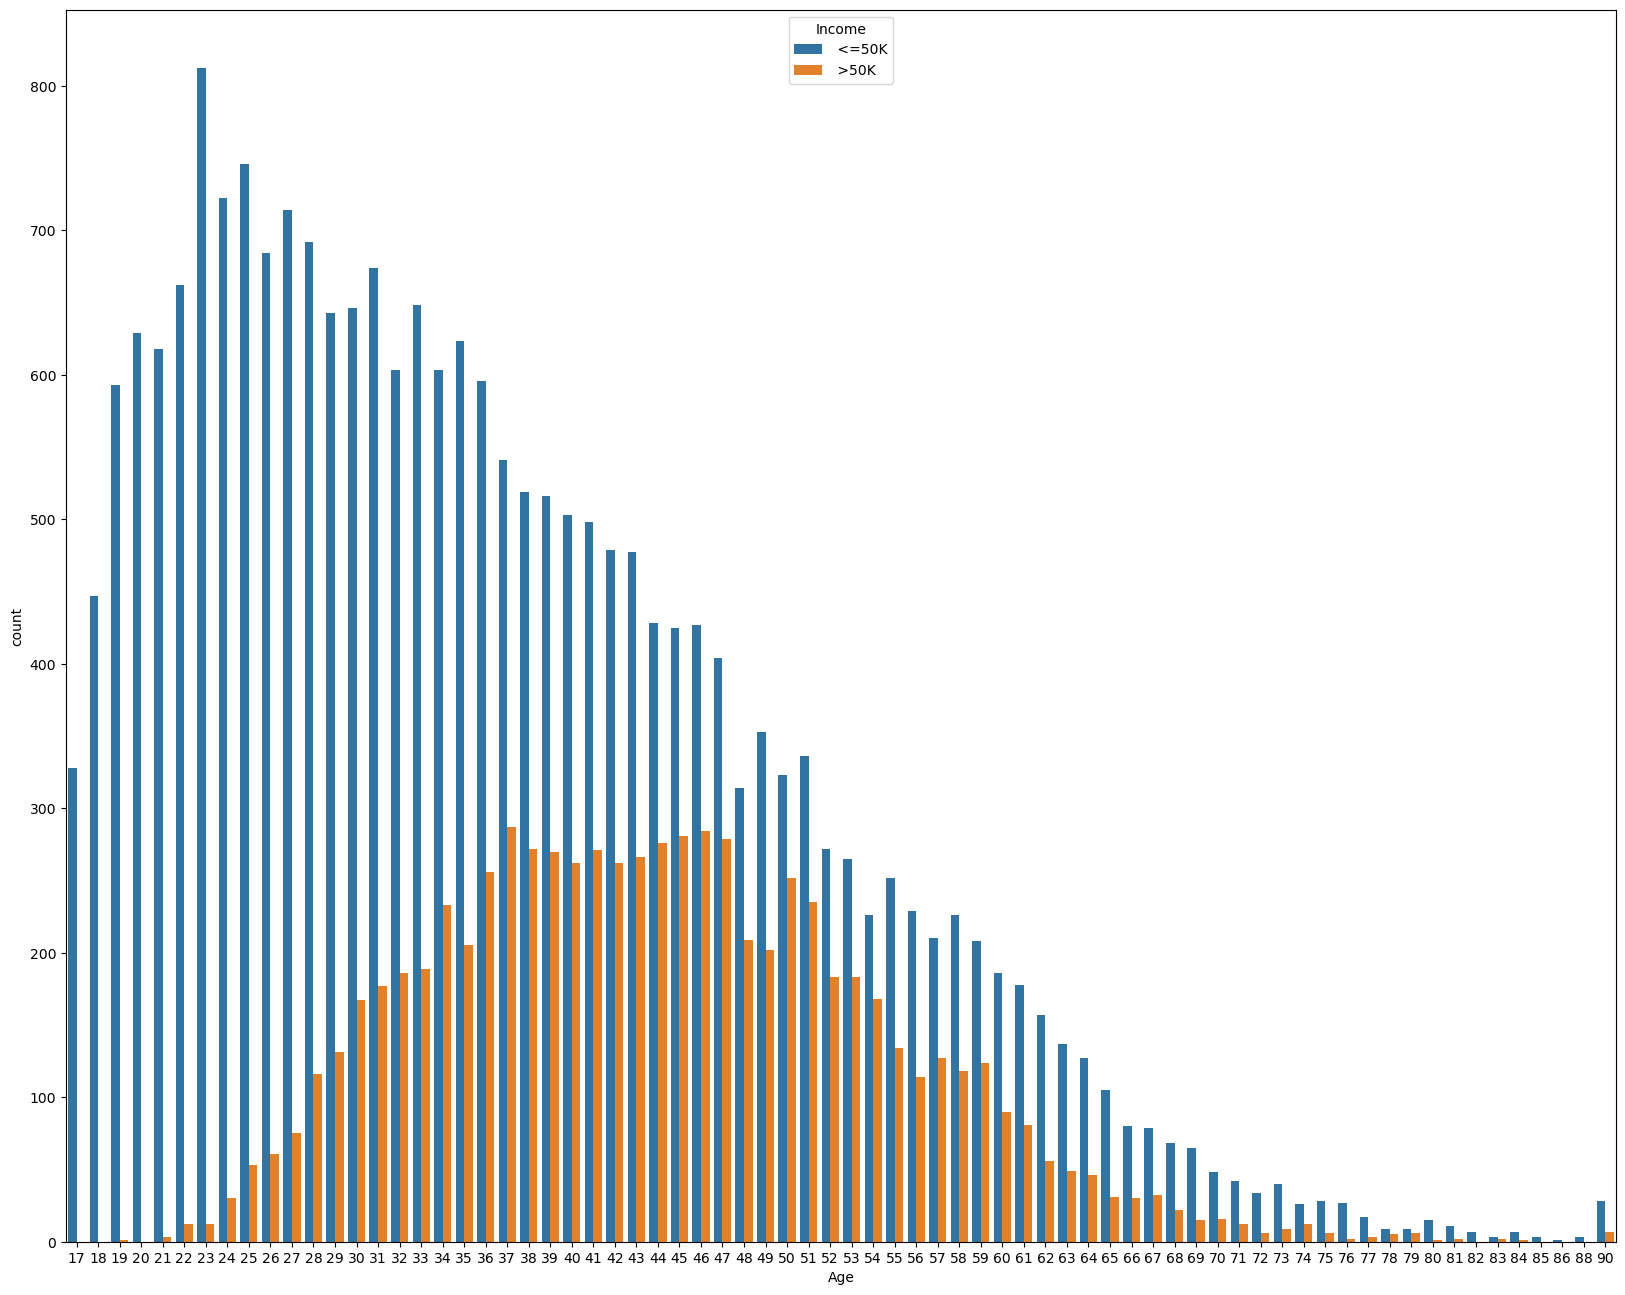

In [28]:
plt.figure(figsize=(20,16))
sns.countplot(x='Age',hue='Income',data=df)

We can find maximum people earning more than 50K dollors belong to age group 30-50.

In [29]:
# Separating  categorical variable
category=df.select_dtypes(include=['object']).columns

In [30]:
category

Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Gender', 'Native Country', 'Income'],
      dtype='object')

In [31]:
# Separating  numerical variable
num=df._get_numeric_data().columns

In [32]:
num

Index(['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss',
       'Hours per Week'],
      dtype='object')

In [33]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
df.dtypes

Age               int64
Workclass         int32
Final Weight      int64
Education         int32
EducationNum      int64
Marital Status    int32
Occupation        int32
Relationship      int32
Race              int32
Gender            int32
Capital Gain      int64
capital loss      int64
Hours per Week    int64
Native Country    int32
Income            int32
dtype: object

Outlier detection

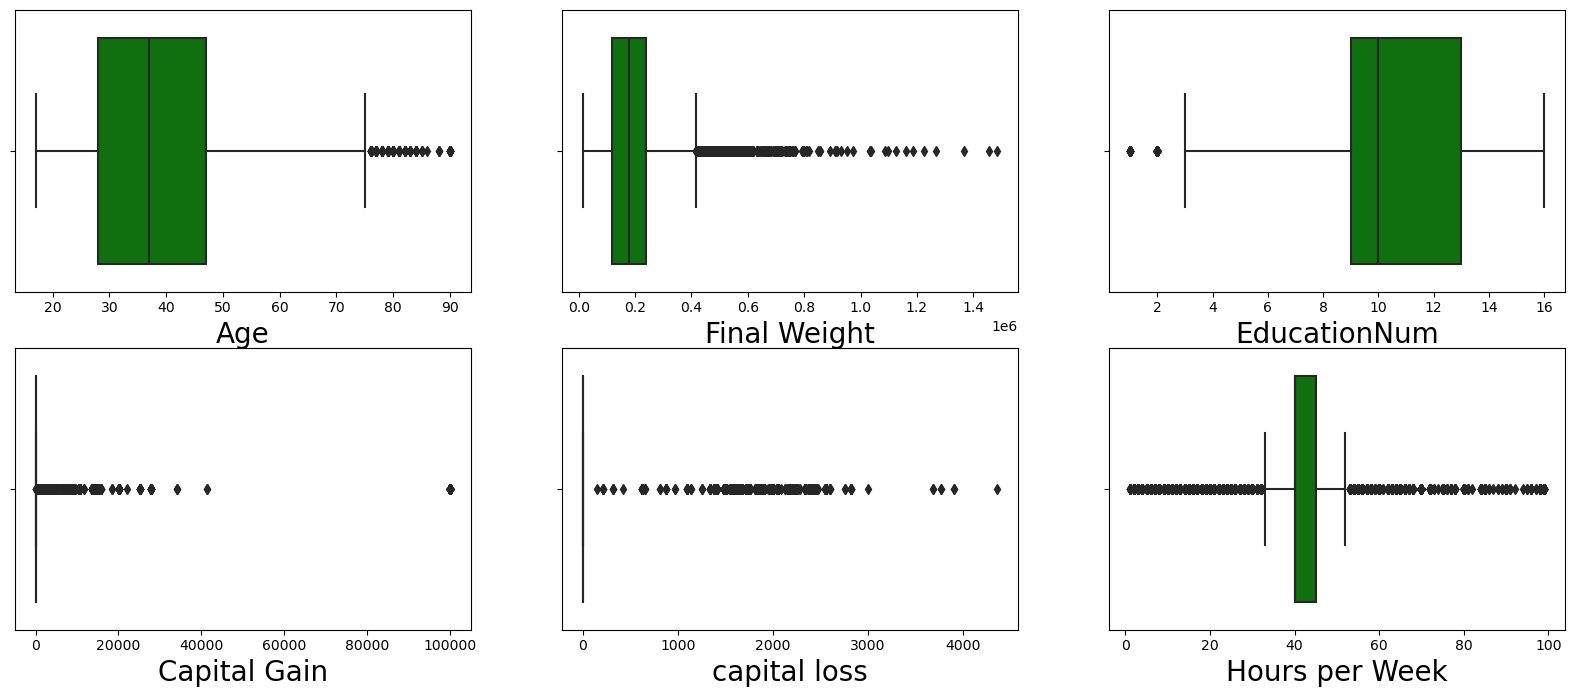

In [35]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

outlier removal using zscore

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [37]:
df1

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


Skewness

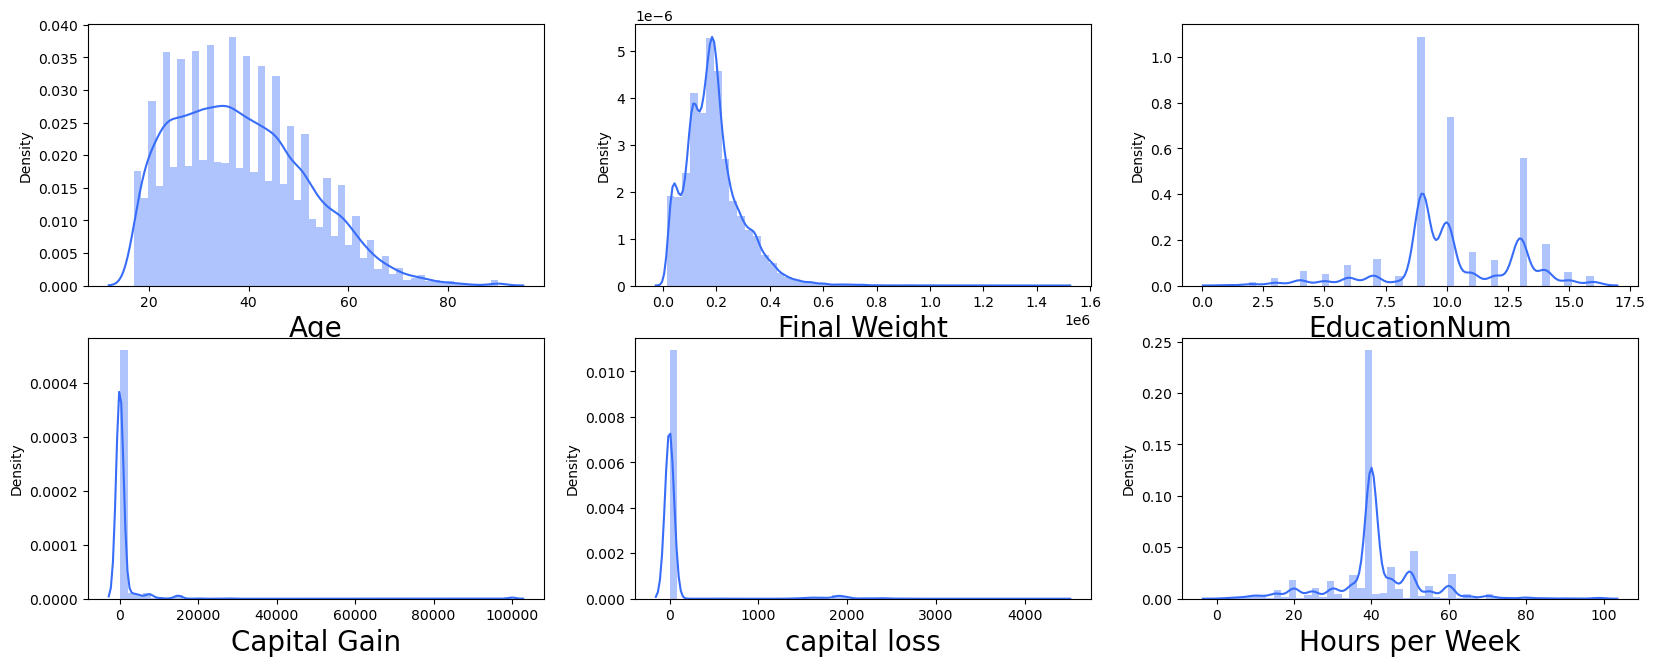

In [38]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in num:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [39]:
df.skew()

Age                0.530228
Workclass          1.154858
Final Weight       1.459220
Education         -0.944948
EducationNum      -0.305379
Marital Status    -0.009453
Occupation         0.110450
Relationship       0.820311
Race              -2.507036
Gender            -0.750636
Capital Gain      11.902682
capital loss       4.526380
Hours per Week     0.330869
Native Country    -4.178907
Income             1.161408
dtype: float64

In [40]:
le = LabelEncoder() # label encoder 
df['Income']=le.fit_transform(df['Income']) 
df['Gender']=le.fit_transform(df['Gender'])

In [41]:
df.isin([' ','NA','-']).sum().any()

False

In [42]:
Numerical=['Age','Final Weight','Education','Capital Gain','capital loss','Hours per Week','Marital Status']
Category=['Workclass','Education','Occupation','Relationship','Race','Gender','Native Country','Income']

In [43]:
df1.shape

(25760, 15)

# Checking Multicollinearity between features using variance_inflation_factor

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,9.562445,Age
1,6.273298,Workclass
2,4.032259,Final Weight
3,9.445689,Education
4,20.502646,EducationNum
5,4.095508,Marital Status
6,3.204648,Occupation
7,2.652229,Relationship
8,18.454213,Race
9,4.621874,Gender


In [45]:
df.Income.value_counts()

0    22654
1     7508
Name: Income, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [47]:
# Oversampleing using SMOTE 
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

0    22654
1    22654
Name: Income, dtype: int64

HENCE IT IS BALANCED

Standard scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

PCA

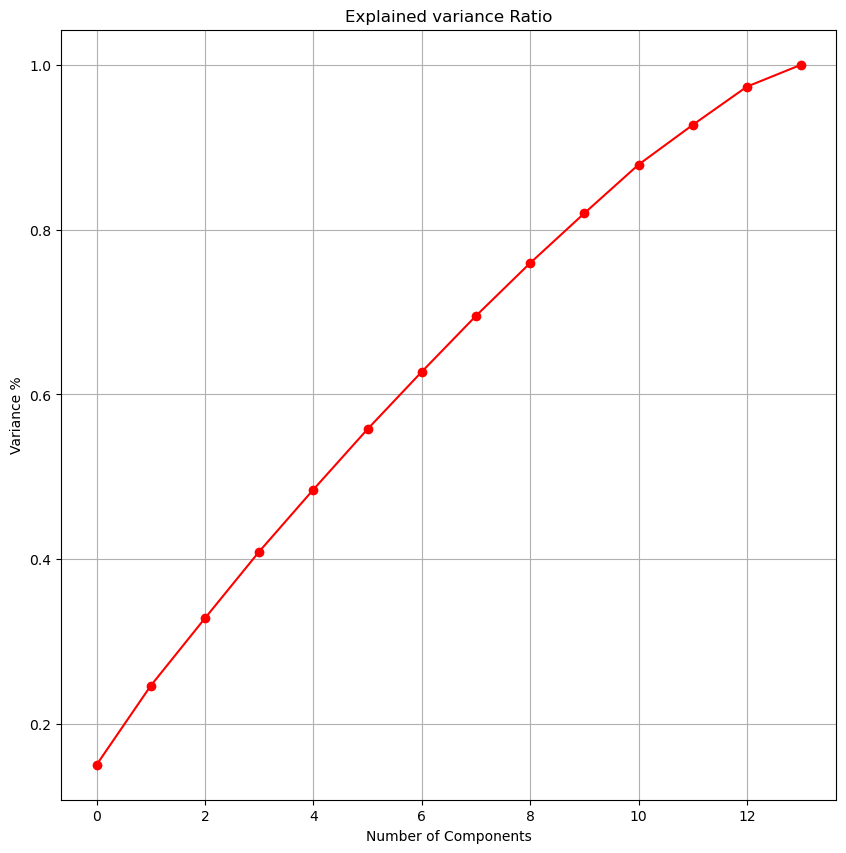

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

we have to pick 9 components

In [50]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (31715, 9)
Training target vector size: (31715,)
Test feature matrix size: (13593, 9)
Test target vector size: (13593,)


finding best random state

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7767233134701684 on Random_state 19


LOGISTIC REGRESSION

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)

In [55]:
print('Accuracy Score of Logistics Regression', accuracy_score(Y_test, y_pred))


Accuracy Score of Logistics Regression 0.7659089237107335


In [56]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

In [57]:
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('',m)
    print('\n')
    print('Accuracy Score :'+'\n', accuracy_score(Y_test, y_pred))
    print("\n")

 LogisticRegression()


Accuracy Score :
 0.7659089237107335


 SVC()


Accuracy Score :
 0.8191716324578827


 GaussianNB()


Accuracy Score :
 0.7436916059736629


 DecisionTreeClassifier()


Accuracy Score :
 0.7676745383653351


 RandomForestClassifier()


Accuracy Score :
 0.8372691826675495


 ExtraTreesClassifier()


Accuracy Score :
 0.8405061428676525




In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation using ',m)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')    



Cross Validation using  LogisticRegression()
Score : [0.74895167 0.77013904 0.77863606 0.77717691 0.78103962]
Mean Score : 0.7711886607047538
Std deviation : 0.011695725505451447




Cross Validation using  SVC()
Score : [0.79110572 0.8248731  0.8734275  0.86866792 0.87164772]
Mean Score : 0.8459443901045784
Std deviation : 0.032813475243783585




Cross Validation using  GaussianNB()
Score : [0.70768042 0.71441183 0.70812183 0.70433727 0.71228341]
Mean Score : 0.7093669525641589
Std deviation : 0.0035678831053062884




Cross Validation using  DecisionTreeClassifier()
Score : [0.74961377 0.80026484 0.88633856 0.89140271 0.8866571 ]
Mean Score : 0.8428553974799557
Std deviation : 0.057748026159326074




Cross Validation using  RandomForestClassifier()
Score : [0.7776429  0.84771574 0.92650629 0.93058161 0.92716036]
Mean Score : 0.8819213803127586
Std deviation : 0.06073915403060462




Cross Validation using  ExtraTreesClassifier()
Score : [0.77455308 0.84120503 0.92418892 0.9268292

# Hyper Parameter Tuning : GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.830 total time=   2.3s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.828 total time=   2.3s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.830 total time=   2.3s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.841 total time=   2.1s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [61]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

In [62]:
mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
mod.fit(X_train,Y_train)
y_pred=mod.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test, y_pred))

Accuracy Score 0.842198190244979
